# Sentiment Analysis using Twitter Dataset

### *IMPORT LIBRARIES*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
tweets_df = pd.read_csv('train.csv')

In [33]:
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [34]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [35]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


#### Insert column is not needed. So discard it.

In [36]:
tweets_df.drop(['id'],axis=1,inplace = True)

### *DATA VISUALIZATION*

#### Let's plot to see if there are any null values in the dataframe

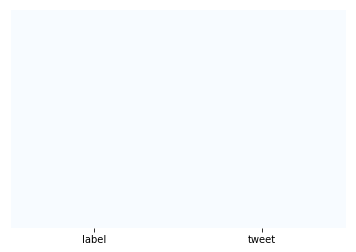

In [37]:
sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

#### From the plot above, we can infer that the rows have no null value.
#### Now we plot a graph to see the count of positive(0) and negative(1) tweets.

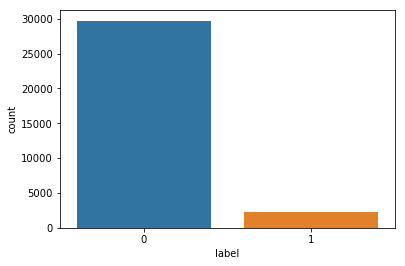

In [40]:
sns.countplot(tweets_df['label'], label = 'Count')

#### We see that there is around 30000 positive tweets and 2000 negative tweets. Which is a huge imbalance!

In [41]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [42]:
tweets_df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


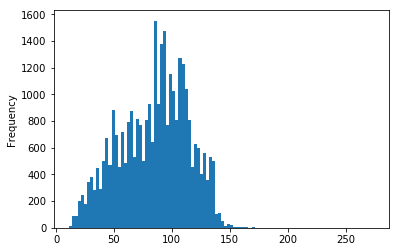

In [43]:
tweets_df['length'].plot(bins = 100, kind = 'hist')

In [45]:
tweets_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


#### Separate positive and negative tweets to make working on them easier.

In [46]:
positive = tweets_df[tweets_df['label'] == 0]

In [47]:
positive.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [48]:
negative = tweets_df[tweets_df['label'] == 1]

In [50]:
negative.head()

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104


#### Let's see the words which are most frequently used in positive tweets. For this we first merge all the positive tweets to one sentence string

In [77]:
sentences_positive = positive['tweet'].tolist()

In [79]:
sentences_to_one_string = " ".join(sentences_positive)

In [72]:
# !pip install WordCloud

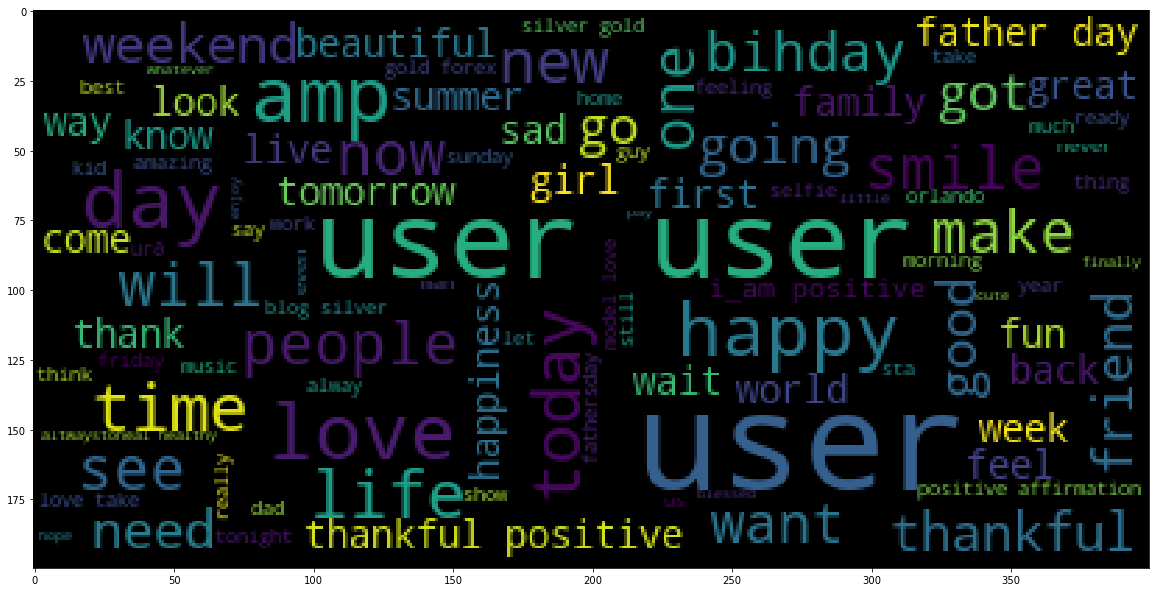

In [73]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(sentences_to_one_string)
plt.imshow(wordcloud)

#### Words like "user", "love" "thankful" are dominant.

In [80]:
sentences_negative = negative['tweet'].tolist()
sentences_to_one_string = ' '.join(sentences_negative)

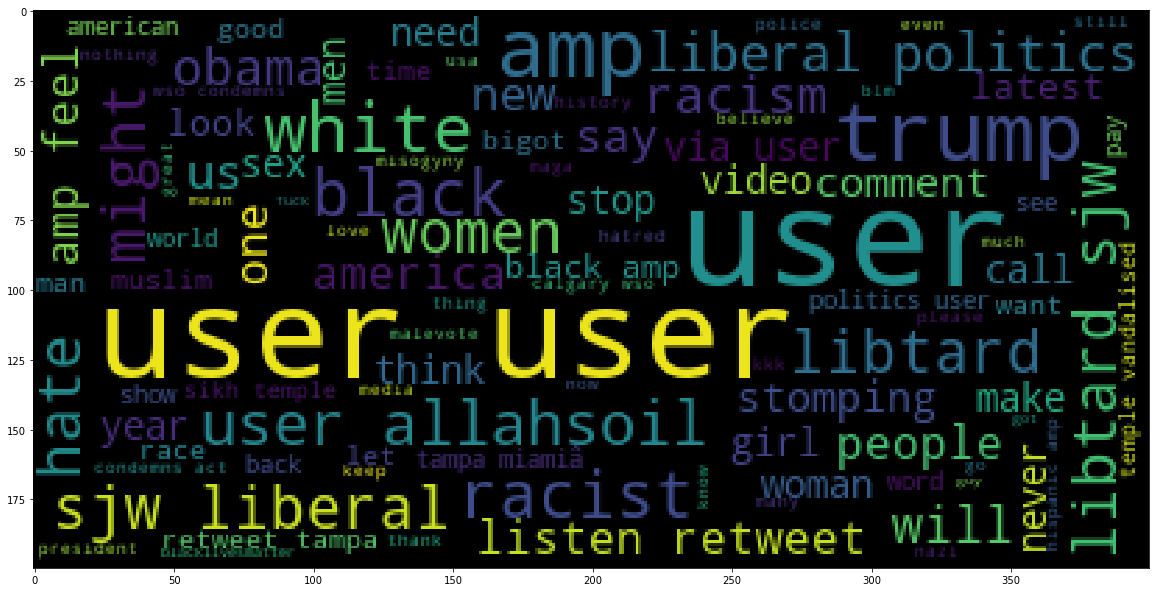

In [81]:
plt.figure(figsize = (20,20))
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(sentences_to_one_string)
plt.imshow(wordcloud)

#### Words like "user", "hate", "racism" are dominant.

###  *DATA CLEANING*

In [84]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

#### Punctuations and stop words(common recurring words that don't add meaning to data like "a","an","the") are considered as noise in the data and thus need to be removed.

In [85]:
#clean noise from the data
def tweet_cleaning(tweet):
    
    #removing punctuations
    punc_removed_text = [char for char in tweet if char not in string.punctuation]
    punc_removed_text = ' '.join(punc_removed_text)
    
    #removing stopwords
    cleaned_text = [word for word in punc_removed_text if word.lower() not in stopwords.words('english')]
    
    return cleaned_text

#### CountVectorizer performs vectorization over every word i.e mapping the words to columns and assigning them values of their document frequency. 

In [107]:
vectorizer = CountVectorizer(analyzer = tweet_cleaning)
tweets_count_vectorizer = vectorizer.fit_transform(tweets_df['tweet'])

#### The shape shows us that there were 125 unique words identified from the corpus.

In [108]:
tweets_count_vectorizer.shape

(31962, 125)

### *PREPARING THE DATA*

In [109]:
X = tweets_count_vectorizer
y = tweets_df['label']

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

### *BUILDING MODELS AND MAKING PREDICTIONS*

#### We're going to build three models upon three algorithms one by one.

### 1. Naive Bayes

In [111]:
from sklearn.naive_bayes import MultinomialNB

NB_clf = MultinomialNB()
NB_clf.fit(X_train, y_train)
NB_predictions = NB_clf.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [113]:
cm = confusion_matrix(y_test, NB_predictions)

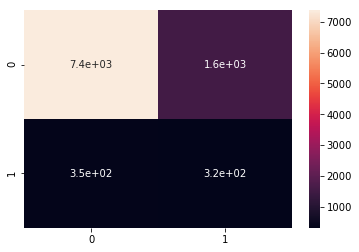

In [114]:
sns.heatmap(cm, annot = True)

In [115]:
print(classification_report(y_test, NB_predictions))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      8924
           1       0.17      0.48      0.25       665

   micro avg       0.80      0.80      0.80      9589
   macro avg       0.56      0.65      0.57      9589
weighted avg       0.90      0.80      0.84      9589



In [116]:
print(accuracy_score(y_test, NB_predictions))

0.8019605798310564


### 2. Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()
LR_clf.fit(X_train, y_train)
LR_predictions = LR_clf.predict(X_test)

C:\Users\Admin\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


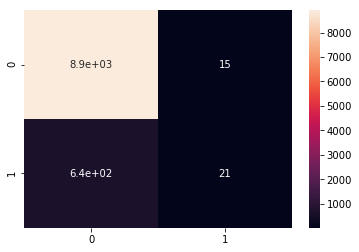

In [121]:
cm = confusion_matrix(y_test, LR_predictions)
sns.heatmap(cm, annot = True)

In [122]:
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8924
           1       0.58      0.03      0.06       665

   micro avg       0.93      0.93      0.93      9589
   macro avg       0.76      0.51      0.51      9589
weighted avg       0.91      0.93      0.90      9589



In [123]:
print(accuracy_score(y_test, LR_predictions))

0.931275419751799


### 3. Support Vector Machine

In [126]:
from sklearn import svm
SVM_clf = svm.SVC()
SVM_clf.fit(X_train, y_train)
SVM_predictions = SVM_clf.predict(X_test)

C:\Users\Admin\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


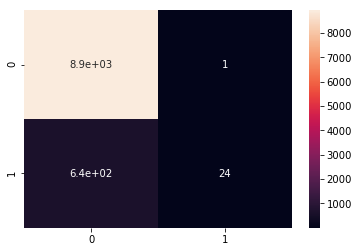

In [127]:
cm = confusion_matrix(y_test, SVM_predictions)
sns.heatmap(cm, annot = True)

In [128]:
print(classification_report(y_test, SVM_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8924
           1       0.96      0.04      0.07       665

   micro avg       0.93      0.93      0.93      9589
   macro avg       0.95      0.52      0.52      9589
weighted avg       0.93      0.93      0.90      9589



In [129]:
print(accuracy_score(y_test, SVM_predictions))

0.9330482844926479


## End